Nama : Sausan<br>
Grup : DS2

Link: https://colab.research.google.com/drive/1swYi2bJ1j5Dpc40h4E2JHU6dxqAm8Nvd?usp=sharing

##Day 1

Senin, 09 Oktober 2023

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#koneksi dari COLAB ke Gdrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load data to colab
path='/content/drive/MyDrive/DataSource/heatingOilTrainingset.csv'

df_dataset=pd.read_csv(path)
df_dataset

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2
...,...,...,...,...,...,...
1213,7,56,264,5,58.2,5
1214,5,78,129,1,22.5,1
1215,5,77,138,3,26.8,1
1216,3,89,156,2,34.0,2


In [4]:
#data Frame
df=pd.DataFrame(df_dataset)
df.head()

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2


##Business Understanding

.....

**Case Problem:** Estimasi

**Judul:** Penerapan Mesin Learning Untuk Mengamankan Stok Level Heating Oil Menggunakan Pendekatan Analisis Prediktif


Predictive stok level heating oil

**Jenis ML:** Supervised Learning
Data Training: Historikal penjualan Heating oil dengan merekap form pelanggan, insulation, temperature,

**Kemungkinan Algoritma Estimasi yang akan digunakan:**
1. Linear Regression
2. MLP Regresor (Artificial Neural Network)

## Data Understanding

Insulation: This is a density rating, ranging from one to ten, indicating the thickness of each home’s insulation. A home with a density rating of one is poorly insulated, while a home with a density of ten has excellent insulation.
 Temperature: This is the average outdoor ambient temperature at each home for the most recent year, measure in degree Fahrenheit.
- Heating_Oil: This is the total number of units of heating oil purchased by the owner of each home in the most recent year.
- Num_Occupants: This is the total number of occupants living in each home.
- Avg_Age: This is the average age of those occupants.
- Home_Size: This is a rating, on a scale of one to eight, of the home’s overall size. The higher the number, the larger the home

In [5]:
#melihat info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     1218 non-null   int64  
 1   Temperature    1218 non-null   int64  
 2   Heating_Oil    1218 non-null   int64  
 3   Num_Occupants  1218 non-null   int64  
 4   Avg_Age        1218 non-null   float64
 5   Home_Size      1218 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.2 KB


In [6]:
#menghitung jumlah missing value
df.isnull().sum()

Insulation       0
Temperature      0
Heating_Oil      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

## Syarat dari penyelesaian problem estimasi : tidak ada variable kategorik

1. Tidak perlu melakukan konversi data, disebabkan semua variabel **NUMERIK**
2. Tidak perlu dilakukan handling missing value, disebabkan datanya bebas missing value

## Pemodelan Data

<Axes: title={'center': 'Pearson Correlation'}>

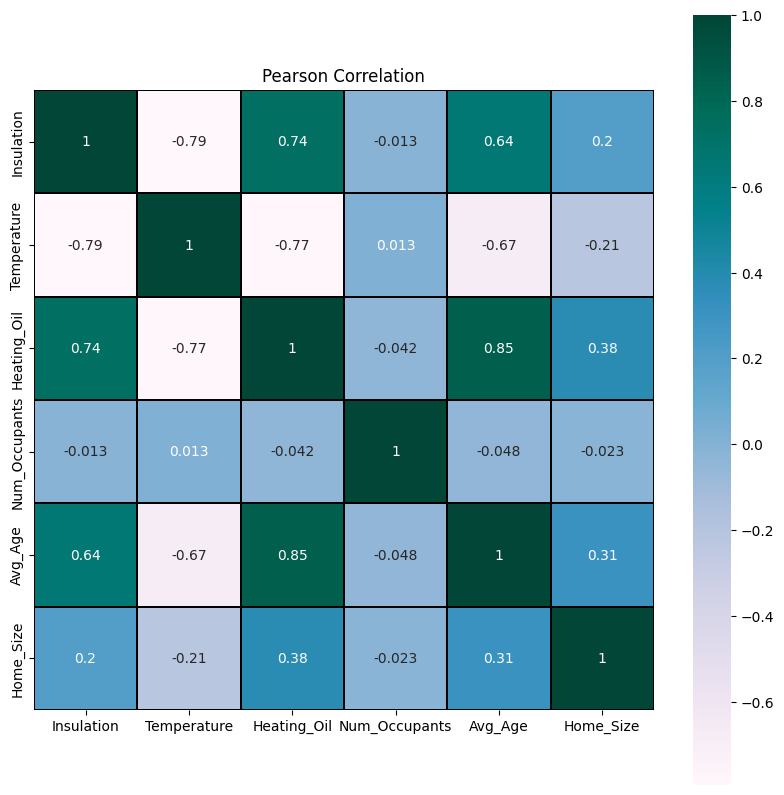

In [7]:
f, ax = plt.subplots(figsize = (10,10))
plt.title ("Pearson Correlation")
sns.heatmap(df.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True, cmap="PuBuGn", linecolor='black', annot=True)

In [8]:
#menentukan input variabel
x=df[['Insulation', 'Temperature', 'Num_Occupants', 'Avg_Age', 'Home_Size']]

#menentukan target variabel
y=df['Heating_Oil']

In [9]:
#untuk split data kita menjadi training dan testing
from sklearn.model_selection import train_test_split

#untuk Linear model
from sklearn.linear_model import LinearRegression

#untuk evaluasi model
from sklearn import metrics

In [10]:
#split data kita menjadi training dan testing, SPLIT 70% training dan 30% testing

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=0)

In [11]:
x_train

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
579,6,75,5,24.1,3
1146,3,87,2,33.6,8
188,5,75,2,21.8,2
491,3,80,2,25.4,8
1217,7,59,1,61.4,5
...,...,...,...,...,...
1033,3,82,5,27.0,3
763,5,76,2,41.3,7
835,3,80,4,23.3,4
559,7,55,3,61.6,7


In [12]:
y_train

579     131
1146    156
188     131
491     134
1217    273
       ... 
1033    146
763     183
835     127
559     273
684     142
Name: Heating_Oil, Length: 852, dtype: int64

##Linear Regression

In [13]:
reg_ln=LinearRegression()
reg_ln

LinearRegression()

In [14]:
#train model
model_ln=reg_ln.fit(x_train, y_train)

In [15]:
#predict model
y_pred_reg=model_ln.predict(x_test)

In [16]:
#evaluasi linear regression
print('r2_score :', metrics.r2_score(y_test, y_pred_reg))

r2_score : 0.8113322126382521


In [17]:
#membuat script MAPE
def mean_absolute_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

print('MAPE :', mean_absolute_percentage_error(y_test, y_pred_reg))

MAPE : 7.845552048912459


##Output :

Hasil evaluasi pada model linear regression : Baik

R2 menunjukkan nilai 0.81 mendekati 1, artinya untuk menjadi excelent hanya kurang 0.2

MAPE = 7.8. Artinya tingkat error = 7.8% dan tingkat kesuksesan = 92.2%

## Pemodelan dengan MLP Regressor (ANN=Artificial Neural Network)

In [18]:
from sklearn.neural_network import MLPRegressor

In [19]:
#object MLP Regressor
mlp_reg=MLPRegressor()

#training model
model_mlp=mlp_reg.fit(x_train,y_train)

#predict model
y_pred_mlp=model_mlp.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
#evaluasi MLP regressor

print('r2_score :', metrics.r2_score(y_test, y_pred_mlp))

r2_score : 0.7686730520779685


In [21]:
print('MAPE :',mean_absolute_percentage_error(y_test,y_pred_mlp))

MAPE : 7.119759912855277


##Output:

Hasil evaluasi pemodelan Neural Netork (MLP Regressor)

1. R2 = 0.78 dalam kategori cukup baik
2. Mape = 7.15% artinya ketepatan model = 92.8%

#Memperbaiki pemodelan MLP Regressor

In [22]:
#object MLP Regressor
mlp_reg=MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=200)

#training model
model_mlp=mlp_reg.fit(x_train,y_train)

#predict model
y_pred_mlp=model_mlp.predict(x_test)

In [23]:
#evaluasi MLP regressor

print('r2_score :', metrics.r2_score(y_test, y_pred_mlp))

r2_score : 0.9202213664011121


In [24]:
print('MAPE :',mean_absolute_percentage_error(y_test,y_pred_mlp))

MAPE : 5.027940702011869


##Output:

Hasil evaluasi pemodelan Neural Netork (MLP Regressor)

1. R2 = 0.90 dalam kategori cukup baik
2. Mape = 5.54% artinya ketepatan model = 94.4%

##Setelah melakukan Tunning parameter maka model terbaik **MLP Regressor** (dengan menambahkan 3 hidden layer) dengan MAPE 5%. Artinya tingkat kegagalan 5% dan tingkat keakuratan 95% dimana r2=0.92.

##Day 2

Rabu, 11 Oktober 2023

##Implementasi MODEL ke data baru (implemen model to mesin learning)

Model yang akan kita gunakan adalah MLP Regressor (ANN = Artificial Neural Network)

In [25]:
#load new customer dataset to colab
path1='/content/drive/MyDrive/DataSource/heatingOilNewust.csv'

df_dataset1=pd.read_csv(path1)
df_dataset1

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7
...,...,...,...,...,...
42645,7,63,9,59.1,8
42646,7,84,1,43.6,5
42647,2,67,1,27.3,4
42648,8,58,1,65.7,3


In [26]:
df1=pd.DataFrame(df_dataset1)

df1

#tidak ada field heating oil, karna ini customer baru yang memang belum pernah melakukan pembelian

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7
...,...,...,...,...,...
42645,7,63,9,59.1,8
42646,7,84,1,43.6,5
42647,2,67,1,27.3,4
42648,8,58,1,65.7,3


##Data Preparation

1. Select input varaibel

In [27]:
x1=df1[['Insulation', 'Temperature', 'Num_Occupants', 'Avg_Age', 'Home_Size']]
x1

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7
...,...,...,...,...,...
42645,7,63,9,59.1,8
42646,7,84,1,43.6,5
42647,2,67,1,27.3,4
42648,8,58,1,65.7,3


##Applying Model

In [28]:
y_predict_mlp=model_mlp.predict(x1)

In [29]:
y_predict_mlp

array([288.3211328 , 195.5422519 , 220.64117809, ..., 125.47166224,
       278.28769957, 234.11839053])

In [30]:
#mengubah hail pemodelan yg berbentuk array menjadi dataframe
df_y_predict_mlp=pd.DataFrame({'Prediction_HeatingOil':y_predict_mlp}).round(2)
df_y_predict_mlp

,Prediction_HeatingOil
0,288.32
1,195.54
2,220.64
3,225.65
4,153.29
...,...
42645,253.18
42646,200.68
42647,125.47
42648,278.29


In [31]:
#menggabungkan dataset NewCustomer dengan hasil predict nya
df_hasil_predict_mlp=pd.concat([df1,df_y_predict_mlp], sort=False, axis=1)
df_hasil_predict_mlp.head()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size,Prediction_HeatingOil
0,5,69,10,70.1,7,288.32
1,5,80,1,66.7,1,195.54
2,4,89,9,67.8,7,220.64
3,7,81,9,52.4,6,225.65
4,4,58,8,22.9,7,153.29


In [32]:
#export to excel
#export as download if in colab
from google.colab import files

file_predict_heatingOil=df_hasil_predict_mlp.to_excel('file_predict_heatingOil.xlsx', sheet_name='predict')
files.download('file_predict_heatingOil.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Jumlah stock yang dibutuhkan bu Melvi untuk converage New Customer dan Old Customer

In [33]:
newCust=df_hasil_predict_mlp['Prediction_HeatingOil'].sum()
OldCust=df['Heating_Oil'].sum()
stock=newCust+OldCust

print('Kebutuhan NewCust :', newCust)
print('Kebutuhan OldwCust :', OldCust)
stock

Kebutuhan NewCust : 8703867.89
Kebutuhan OldwCust : 240426


8944293.89